In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.font_manager as fm
import matplotlib
import timeit
import feather
import statsmodels as stm
import autotime
%matplotlib inline
%load_ext autotime
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression as LinR
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split

C:\CS\Anaconda\envs\DublinBus\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
res = pd.read_csv('Route_XXXX_travel_time_csvs/Route_016C_travel_time.csv')
route_list_SSID13551357 = ['068A', '0016', '065B', '0122', '0083', '0009', '083A', '0065', '0068']
for r in route_list_SSID13551357:
    df = pd.read_csv('Route_XXXX_travel_time_csvs/Route_%s_travel_time.csv' % r)
    res = pd.concat([df, res], axis=0) 
res

,Day,DestStopID,HourFrame,JourneyPatternID,Rain,SSID,SchoolHoliday,SourceStopID,TimeFrame,TravelTime,VehicleJourneyID,WindSpeed
0,Tuesday,1278,7,680001,0.033333,44951278,False,4495,2012-11-06,17,1916,14.5
1,Tuesday,1282,7,680001,0.033333,12781282,False,1278,2012-11-06,61,1916,14.5
2,Tuesday,4456,7,680001,0.033333,12824456,False,1282,2012-11-06,59,1916,14.5
3,Tuesday,1284,7,680001,0.033333,44561284,False,4456,2012-11-06,41,1916,14.5
4,Tuesday,1285,8,680001,0.000000,12841285,False,1284,2012-11-06,80,1916,15.0
5,Tuesday,1286,8,680001,0.000000,12851286,False,1285,2012-11-06,179,1916,15.0
6,Tuesday,1288,8,680001,0.000000,12861288,False,1286,2012-11-06,20,1916,15.0
7,Tuesday,1289,8,680001,0.000000,12881289,False,1288,2012-11-06,41,1916,15.0
8,Tuesday,1360,8,680001,0.000000,12891360,False,1289,2012-11-06,89,1916,15.0
9,Tuesday,1362,8,680001,0.000000,13601362,False,1360,2012-11-06,20,1916,15.0


time: 4.23 s


Description:  This segment is on George's Street, going into the city centre, just before turning right onto Dame Street.

In [3]:
#check unique values of each feature

print("Feature, UniqueValues") 
for column in res:
    print(column + "\t" + str(len(res[column].unique())))

Feature, UniqueValues
Day	7
DestStopID	812
HourFrame	20
JourneyPatternID	48
Rain	129
SSID	5017
SchoolHoliday	2
SourceStopID	809
TimeFrame	57
TravelTime	1792
VehicleJourneyID	4963
WindSpeed	58
time: 301 ms


In [4]:
# create dataframe for SSID 13551357

res['SSID'] = res['SSID'].astype('category')
george = res[res.SSID == 13551357]
george.shape

(16093, 12)

time: 204 ms


In [5]:
#check unique values of each feature

print("Feature, UniqueValues") 
for column in george:
    print(column + "\t" + str(len(george[column].unique())))

Feature, UniqueValues
Day	7
DestStopID	1
HourFrame	20
JourneyPatternID	20
Rain	126
SSID	1
SchoolHoliday	2
SourceStopID	1
TimeFrame	57
TravelTime	347
VehicleJourneyID	2691
WindSpeed	58
time: 10 ms


In [6]:
# drop unneeded columns

george = george.drop(['SourceStopID', 'DestStopID'], axis=1)

time: 3 ms


In [7]:
# reorder columns

george = george[['TravelTime', 'HourFrame', 'Day', 'SchoolHoliday', 'Rain', 'WindSpeed', 'TimeFrame', 'JourneyPatternID', 'VehicleJourneyID', 'SSID']]

time: 5 ms


In [8]:
# apply any necessary leading zeroes to make all SSIDs 8 digit strings 
george.SSID = george.SSID.apply(lambda x: str(int(x)).zfill(8))

time: 36 ms


In [9]:
george.reset_index(inplace=True)
george = george.drop('index', axis=1)
george

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID
0,60,7,Tuesday,False,0.033333,14.5,2012-11-06,681001,1915,13551357
1,41,7,Wednesday,False,0.000000,14.0,2012-11-07,681001,1915,13551357
2,41,7,Thursday,False,0.000000,12.5,2012-11-08,681001,1915,13551357
3,39,7,Friday,False,1.166667,16.0,2012-11-09,681001,1915,13551357
4,61,7,Saturday,True,0.033333,10.0,2012-11-10,681001,9102,13551357
5,81,7,Monday,False,0.666667,9.5,2012-11-12,681001,1915,13551357
6,61,7,Tuesday,False,0.000000,18.0,2012-11-13,681001,1915,13551357
7,41,7,Wednesday,False,0.000000,13.0,2012-11-14,681001,1915,13551357
8,39,7,Thursday,False,0.000000,3.5,2012-11-15,681001,1915,13551357
9,18,7,Friday,False,0.000000,2.5,2012-11-16,681001,1915,13551357


time: 36 ms


In [10]:
# save as csv

r = george.loc[0, 'SSID'] 
george.to_csv('SSID_CSVs/SSID_%s.csv' % r)

time: 143 ms


In [11]:
# load csv

george = pd.read_csv('SSID_CSVs/SSID_%s.csv' % r)

time: 23 ms


In [12]:
# apply any necessary leading zeroes to make all SSIDs 8 digit strings 

george.SSID = george.SSID.apply(lambda x: str(int(x)).zfill(8))

time: 12 ms


In [13]:
george.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16093 entries, 0 to 16092
Data columns (total 11 columns):
Unnamed: 0          16093 non-null int64
TravelTime          16093 non-null int64
HourFrame           16093 non-null int64
Day                 16093 non-null object
SchoolHoliday       16093 non-null bool
Rain                16093 non-null float64
WindSpeed           16093 non-null float64
TimeFrame           16093 non-null object
JourneyPatternID    16093 non-null object
VehicleJourneyID    16093 non-null int64
SSID                16093 non-null object
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 4.7 MB
time: 17 ms


In [14]:
george = george.drop('Unnamed: 0', axis=1)

time: 3 ms


In [15]:
# assign more appropriate datatypes
george['Day'] = george['Day'].astype('category')
george['JourneyPatternID'] = george['JourneyPatternID'].astype('category')
george['VehicleJourneyID'] = george['VehicleJourneyID'].astype('category')
george['SSID'] = george['SSID'].astype('category')
george['HourFrame'] = george['HourFrame'].astype('category')
george['TimeFrame'] = pd.to_datetime(george['TimeFrame'], format='%Y-%m-%d')

time: 14 ms


In [16]:
# necessary for later operation

george.JourneyPatternID.cat.remove_unused_categories(inplace=True)

time: 2 ms


In [17]:
george.memory_usage(deep=True)

Index                   80
TravelTime          128744
HourFrame            16893
Day                  16862
SchoolHoliday        16093
Rain                128744
WindSpeed           128744
TimeFrame           128744
JourneyPatternID     17363
VehicleJourneyID    135634
SSID                 16238
dtype: int64

time: 5 ms


## Analysis of target feature TravelTime

Histiogram of values (x-axis is number of seconds)

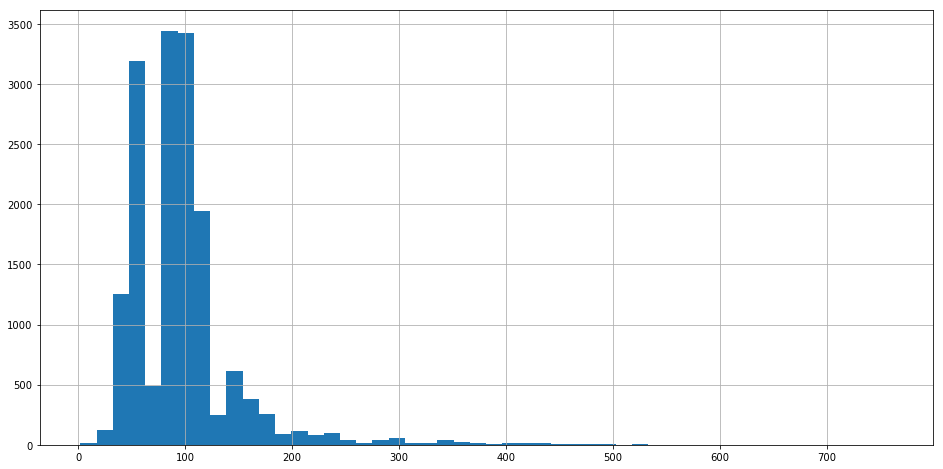

time: 221 ms


In [18]:
george.TravelTime.hist(figsize=(16, 8), bins=50)

Boxplot to check for outliers

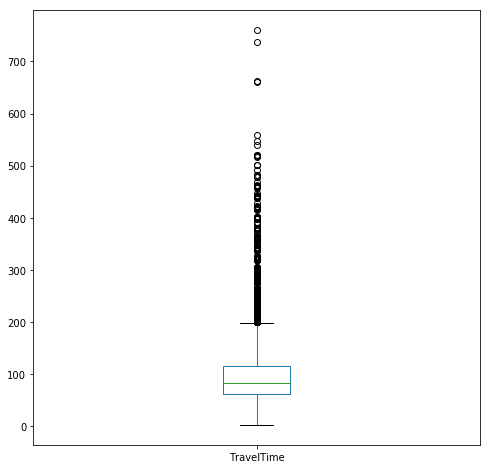

time: 231 ms


In [19]:
george.TravelTime.plot(kind='box', figsize=(8, 8), showfliers=True)

In [20]:
# checking how isolated top high-value outliers are in terms of time/date, and density of low-value outliers 

george.sort_values(['TravelTime', 'TimeFrame'], ascending=False, inplace=True)
george

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID
11005,761,21,Wednesday,False,0.000000,16.0,2013-01-30,1221001,1418,13551357
5443,737,21,Wednesday,False,0.000000,16.0,2013-01-30,91001,3608,13551357
5565,663,23,Friday,False,0.000000,18.0,2013-01-25,91002,3639,13551357
7293,661,23,Friday,False,0.600000,11.0,2013-01-18,831001,5691,13551357
8191,559,22,Thursday,False,0.000000,11.0,2012-11-08,1221001,1665,13551357
7807,547,23,Friday,False,0.000000,6.5,2012-11-23,831003,6215,13551357
6293,540,20,Thursday,False,0.000000,17.0,2012-11-22,831001,6296,13551357
6341,520,20,Friday,False,0.000000,8.5,2012-11-23,831001,6296,13551357
8184,520,21,Thursday,False,0.000000,11.0,2012-11-08,1221001,1650,13551357
11053,519,23,Friday,False,0.000000,6.5,2012-11-23,1221002,1448,13551357


time: 40 ms


Observation:  

## Weather features

(array([ 0.5,  1.5,  2.5]), <a list of 3 Text xticklabel objects>)

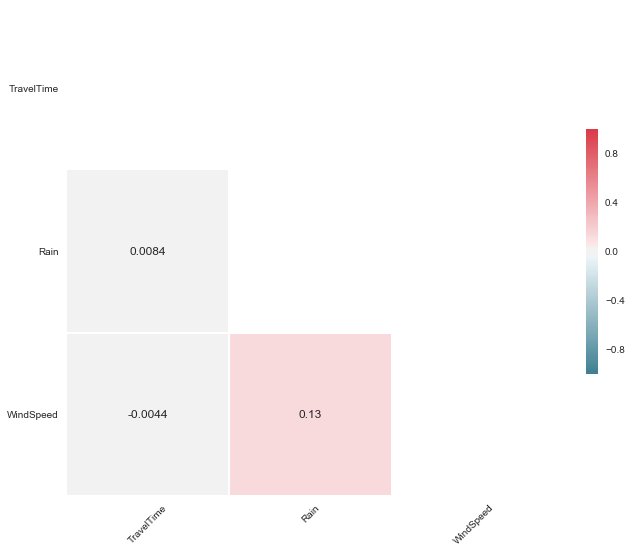

time: 214 ms


In [21]:
# checking correlations between weather and TravelTime

cont_columns = george[['TravelTime', 'Rain', 'WindSpeed']].columns

# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = df[cont_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

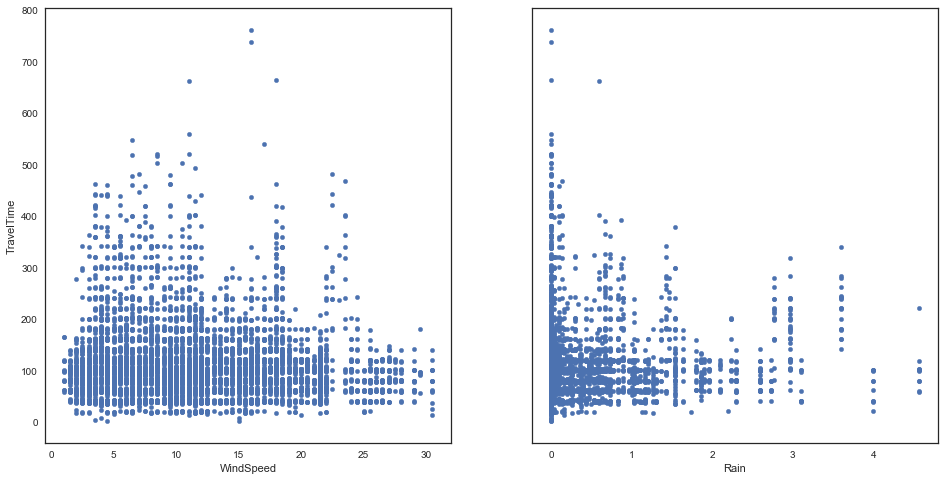

time: 629 ms


In [22]:
# scatterplots for the relationship between weather and TravelTime
fig, axs = plt.subplots(1, 2, sharey=True)
george.plot(kind='scatter', x='WindSpeed', y='TravelTime', ax=axs[0], figsize=(16, 8))
george.plot(kind='scatter', x='Rain', y='TravelTime', ax=axs[1])

Observation:  

## TravelTime and categorical features

In [23]:
# Checking stats for TravelTime so as to better understand the following graphs
# Create values for horizontal lines in the charts below to represent the mean/medium.

george_mean = george.TravelTime.mean()
george_median  = george.TravelTime.median()
george.TravelTime.describe()

count    16093.000000
mean        96.409930
std         51.760333
min          2.000000
25%         61.000000
50%         82.000000
75%        116.000000
max        761.000000
Name: TravelTime, dtype: float64

time: 9 ms


## JourneyPatternID strip plot

#### Note: In below charts, horizontal line is overall mean/median

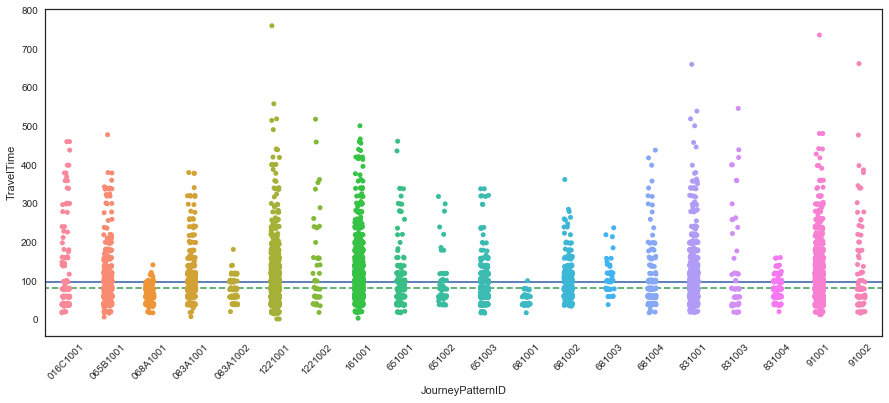

time: 624 ms


In [24]:
george.JourneyPatternID.cat.remove_unused_categories(inplace=True)
fig, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation=45)
sns.stripplot(x='JourneyPatternID', y="TravelTime", data=george, jitter=True);

coord_x1 = -1
coord_y1 = george_mean
coord_z1 = george_median
coord_x2 = 30


# mean full line, median dashed line
plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')
plt.plot([coord_x1, coord_x2], [coord_z1, coord_z1], '--')

Observation:  

### Bar plot for mean TravelTime per JourneyPatternID

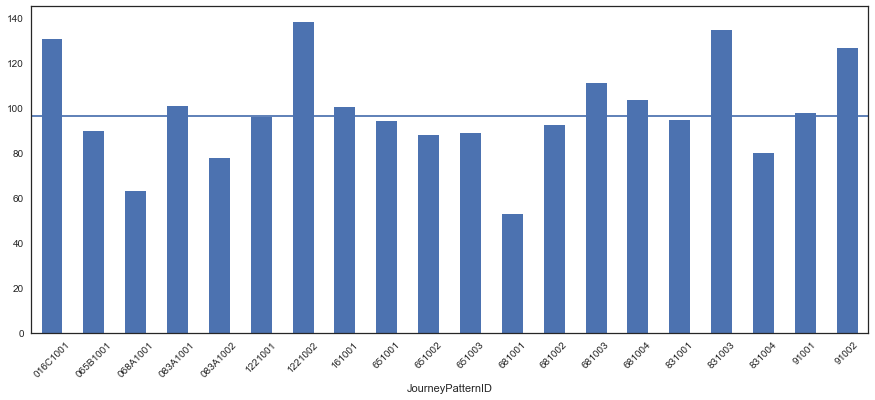

time: 203 ms


In [25]:
mean_JPID = george.groupby('JourneyPatternID')['TravelTime'].mean()
mean_JPID.plot(kind='bar', figsize=(15, 6), rot=45)

# code for line from https://stackoverflow.com/questions/38017465/how-to-add-a-line-on-top-of-a-bar-chart

coord_x1 = -1
coord_y1 = george_mean
coord_x2 = 30

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime per JourneyPatternID

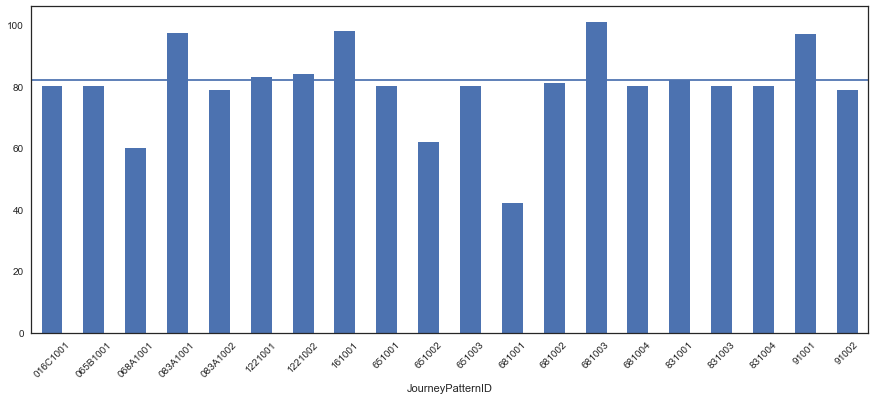

time: 198 ms


In [26]:
median_JPID = george.groupby('JourneyPatternID')['TravelTime'].median()
median_JPID.plot(kind='bar', figsize=(15, 6), rot=45)

coord_x1 = -1
coord_y1 = george_median
coord_x2 = 30

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation: Spome clearly high, some clearly low.

### Bar plot for mean TravelTime per HourFrame

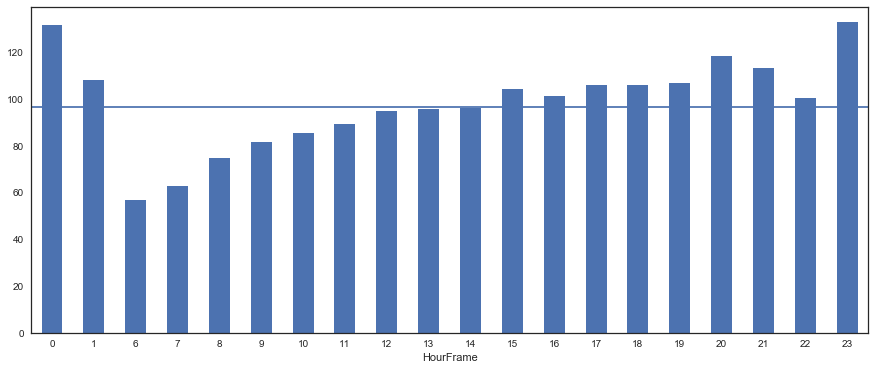

time: 185 ms


In [27]:
mean_HF = george.groupby('HourFrame')['TravelTime'].mean()
mean_HF.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = george_mean
coord_x2 = 25

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime per HourFrame

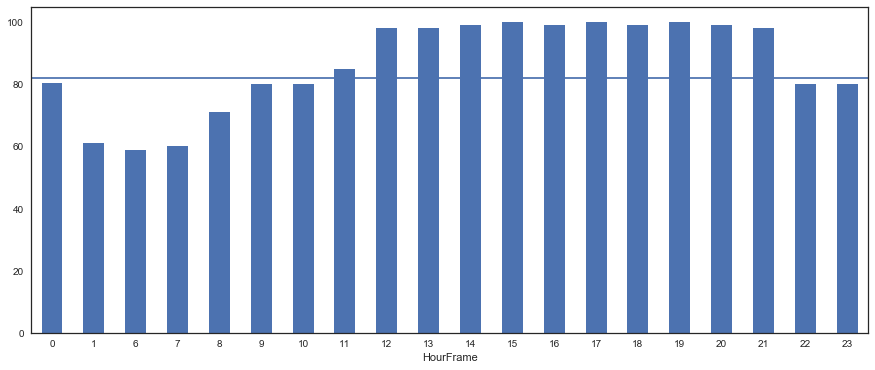

time: 186 ms


In [28]:
med_HF = george.groupby('HourFrame')['TravelTime'].median()
med_HF.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = george_median
coord_x2 = 25

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  Above-median from midday to 9pm.  Quite in the morning.

### Bar plot for mean TravelTime per Day

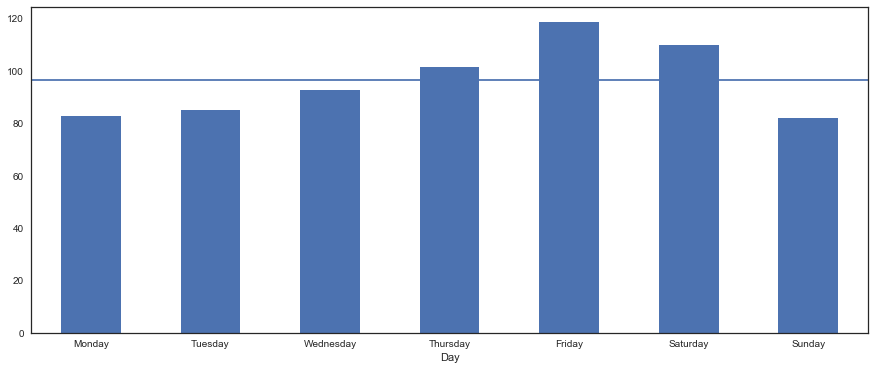

time: 148 ms


In [29]:
mean_Day = george.groupby('Day')['TravelTime'].mean()
mean_Day=mean_Day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

mean_Day.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = george_mean

coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime per HourFrame

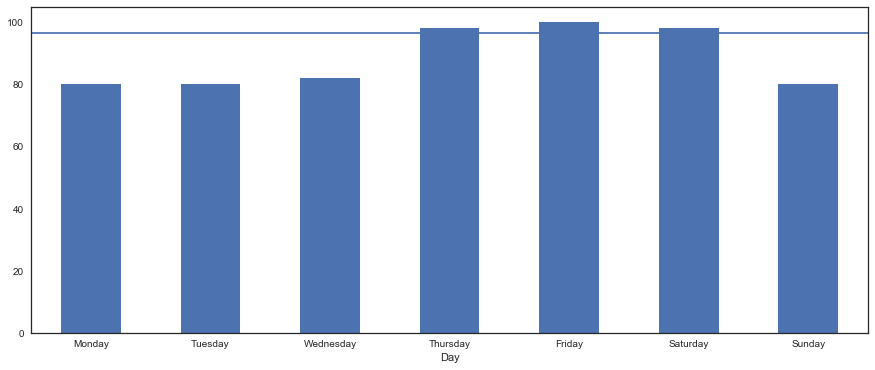

time: 183 ms


In [30]:
med_Day = george.groupby('Day')['TravelTime'].median()

med_Day=med_Day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
med_Day.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = george_mean
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  Busiest Thurs-Sat.  2 distinct tiers.  Nightlife area.

### Bar plot for mean TravelTime when SchoolHoliday true/false

In [31]:
# check how many rows are true/false for SchoolHoliday
george.SchoolHoliday.describe().T

count     16093
unique        2
top       False
freq      11819
Name: SchoolHoliday, dtype: object

time: 5 ms


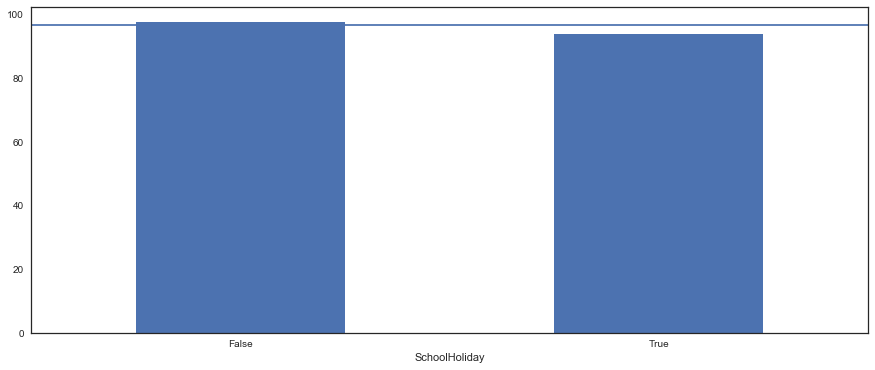

time: 128 ms


In [32]:
mean_SH = george.groupby('SchoolHoliday')['TravelTime'].mean()
mean_SH.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = george_mean
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime when SchoolHoliday true/false

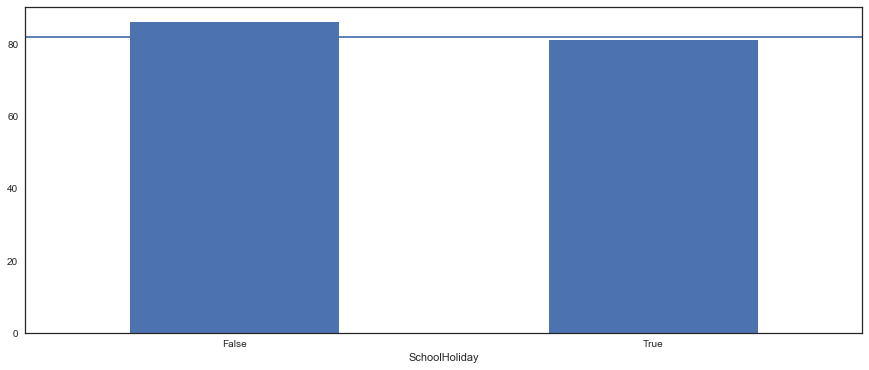

time: 137 ms


In [33]:
med_SH = george.groupby('SchoolHoliday')['TravelTime'].median()
med_SH.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = george_median
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  Not very sensitive to this.

Observation:  

## Looking at dropping outliers

In [35]:
# make a copy of original df
trimgeorge = george.copy()

# Remove TravelTime outliers beyond a conservative 3 x IQR
# Code adapted from here: http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/07%20-%20Lesson.ipynb
# Also got some help here: https://www.reddit.com/r/learnpython/comments/65sz8g/trying_to_get_highlight_outliers_in_a_dataframe/
# Functions first defined for calculating upper and lower bounds.
lowerOp = trimgeorge.quantile(q=.25) - (3*(trimgeorge.quantile(q=.75)-trimgeorge.quantile(q=.25)))
upperOp = trimgeorge.quantile(q=.75) + (3*(trimgeorge.quantile(q=.75)-trimgeorge.quantile(q=.25)))

# New boolean column created where values beyond the bounds for 'TravelTime' are tagged as True.
trimgeorge['OutlierTT'] = (trimgeorge['TravelTime'] < lowerOp['TravelTime']) | (trimgeorge['TravelTime'] > upperOp['TravelTime'])

# Outlier rows counted
print("There would be", trimgeorge[(trimgeorge['OutlierTT'] == True)].shape[0], "outliers dropped.")

There would be 245 outliers dropped.
time: 22 ms


In [36]:
trimgeorge = trimgeorge[trimgeorge.OutlierTT != True]
trimgeorge.sort_values(['TravelTime'], ascending=False, inplace=True)

time: 53 ms


In [37]:
trimgeorge

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID,XBuses,OutlierTT
4333,281,18,Friday,False,0.000000,8.0,2013-01-11,91001,3621,13551357,0,False
1066,281,20,Friday,False,0.000000,8.5,2012-11-23,651002,3329,13551357,0,False
1649,281,20,Saturday,True,0.000000,10.5,2012-11-17,083A1001,13311,13551357,0,False
2845,281,21,Friday,False,0.033325,7.0,2012-11-16,91001,4373,13551357,0,False
826,281,21,Tuesday,False,0.033333,14.5,2012-11-13,651001,3987,13551357,0,False
14125,281,19,Sunday,True,0.000000,8.5,2013-01-06,161001,15572,13551357,0,False
3620,280,21,Thursday,False,0.000000,3.5,2012-11-29,91001,3746,13551357,0,False
12647,280,21,Wednesday,False,0.000000,5.5,2012-11-14,161001,6174,13551357,0,False
6326,280,21,Friday,False,0.000000,8.0,2012-11-23,831001,6252,13551357,0,False
13319,280,23,Saturday,True,1.433333,11.5,2012-11-24,161001,11338,13551357,0,False


time: 41 ms


NOTE - Outliers not removed.

Observation:  

### Linear Regression model

In [38]:
# Train/fit a model using all features to start with.
# Some modifications to the data first

# dropping SSID and TimeFrame as these have no predictive value here
LRgeorge = george.drop(['SSID', 'TimeFrame'], axis=1)

# Convert binary categorical SchoolHoliday column to numerical.
LRgeorge['SchoolHoliday'] = LRgeorge['SchoolHoliday'].astype('int')

time: 4 ms


In [45]:
# preliminary training to see which variables are worth selecting
lrle = sm.ols(formula="TravelTime ~  SchoolHoliday + WindSpeed + Rain + C(JourneyPatternID)+ C(HourFrame) + C(Day)", data=LRgeorge).fit()

time: 130 ms


In [46]:
print(lrle.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     79.25
Date:                Mon, 31 Jul 2017   Prob (F-statistic):               0.00
Time:                        01:13:10   Log-Likelihood:                -84668.
No. Observations:               16093   AIC:                         1.694e+05
Df Residuals:                   16045   BIC:                         1.698e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Observation:  Almost all hours and days register an effect here, though windspeed looks shaky.   We'll remove all JPIDs bar 065B1001 and 651003 and look again.

In [41]:
rsqa = stm.regression.linear_model.RegressionResults.rsquared_adj(lrle) 

print ("Many JourneyPatternIDs have p-values too high (over 0.05), so they will be cut next.")
print ("The R-squared value of", rsqa, "means that Linear Regression is unlikely to be useful in the long run though.")
#ols(y=rets['AAPL'], x=rets.ix[:, ['GOOG']]).rsquared

Many JourneyPatternIDs have p-values too high (over 0.05), so they will be cut next.
The R-squared value of 0.186030224746 means that Linear Regression is unlikely to be useful in the long run though.
time: 2 ms


In [42]:
# Train/fit a model using features with p-value under 0.05

# create dummy variables from HourFrame, Day, JourneyPatternID using get_dummies
# code adapted from: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
HF_dummies = pd.get_dummies(LRgeorge.HourFrame, prefix='HF')
Day_dummies = pd.get_dummies(LRgeorge.Day, prefix='Day')
JPID_dummies = pd.get_dummies(LRgeorge.JourneyPatternID, prefix='JPID')

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
LRgeorge = pd.concat([LRgeorge, HF_dummies, Day_dummies, JPID_dummies], axis=1)

time: 8 ms


In [43]:
print(LRgeorge.columns.values.tolist())

['TravelTime', 'HourFrame', 'Day', 'SchoolHoliday', 'Rain', 'WindSpeed', 'JourneyPatternID', 'VehicleJourneyID', 'XBuses', 'HF_0', 'HF_1', 'HF_6', 'HF_7', 'HF_8', 'HF_9', 'HF_10', 'HF_11', 'HF_12', 'HF_13', 'HF_14', 'HF_15', 'HF_16', 'HF_17', 'HF_18', 'HF_19', 'HF_20', 'HF_21', 'HF_22', 'HF_23', 'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday', 'JPID_016C1001', 'JPID_065B1001', 'JPID_068A1001', 'JPID_083A1001', 'JPID_083A1002', 'JPID_1221001', 'JPID_1221002', 'JPID_161001', 'JPID_651001', 'JPID_651002', 'JPID_651003', 'JPID_681001', 'JPID_681002', 'JPID_681003', 'JPID_681004', 'JPID_831001', 'JPID_831003', 'JPID_831004', 'JPID_91001', 'JPID_91002']
time: 2 ms


In [ ]:
LRgeorge.head(25)

In [47]:
lrle1 = sm.ols(formula="TravelTime ~  JPID_065B1001 + JPID_651003 + SchoolHoliday + WindSpeed + Rain + HF_0 + HF_1 + HF_6 + HF_7 + HF_8 + HF_9 + HF_10 + HF_11 + HF_12 + HF_13 + HF_14 + HF_15 + HF_16 + HF_17 + HF_18 + HF_19 + HF_20 + HF_21 + HF_22 + HF_23 + Day_Friday + Day_Monday + Day_Saturday + Day_Sunday + Day_Thursday + Day_Tuesday + Day_Wednesday", data=LRgeorge).fit()

time: 61 ms


In [48]:
print(lrle1.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     120.8
Date:                Mon, 31 Jul 2017   Prob (F-statistic):               0.00
Time:                        01:19:15   Log-Likelihood:                -84711.
No. Observations:               16093   AIC:                         1.695e+05
Df Residuals:                   16062   BIC:                         1.697e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        87.2310      0.886     98.503

Observation:  Windspeed is not a factor here.  Don't understand why midday is suddenly of such low value.